In [ ]:
"""
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share.
Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 
"""

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
df=pd.read_csv(r"Titanic_train.csv")

In [57]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
df = df.fillna(df.mean(numeric_only=True))

In [62]:
df.duplicated().sum()

np.int64(0)

In [53]:
#There is no duplicate value

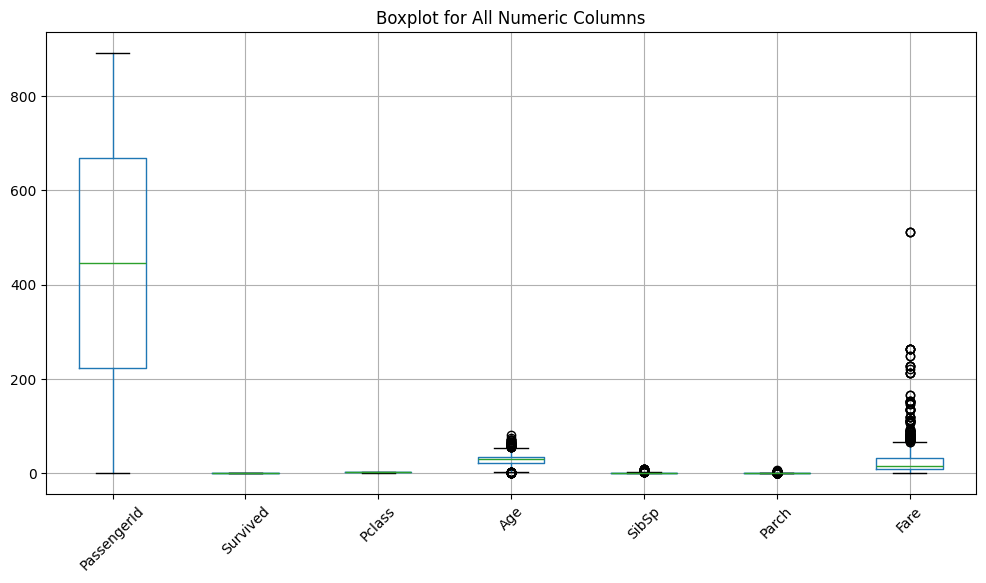

In [63]:
#box plotting for detecting outlier
# Plot boxplot for all numeric columns
df.boxplot(figsize=(12, 6))
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

In [72]:
#Detect outlier using IQR

numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers


In [71]:
# Outlier capping function
def outlier_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(
        lambda x: lower_limit if x < lower_limit 
        else upper_limit if x > upper_limit 
        else x
    )

# Apply outlier capping to all numeric columns
for column in df.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(df, column)


In [92]:

numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [74]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035533,-0.072778,NaN,0.003243
Survived,-0.005007,1.000000,-0.338481,-0.065857,0.031434,NaN,0.317430
Pclass,-0.035144,-0.338481,1.000000,-0.330962,0.023180,NaN,-0.715300
Age,0.035533,-0.065857,-0.330962,1.000000,-0.251585,NaN,0.137498
SibSp,-0.072778,0.031434,0.023180,-0.251585,1.000000,NaN,0.349615
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.003243,0.317430,-0.715300,0.137498,0.349615,NaN,1.000000


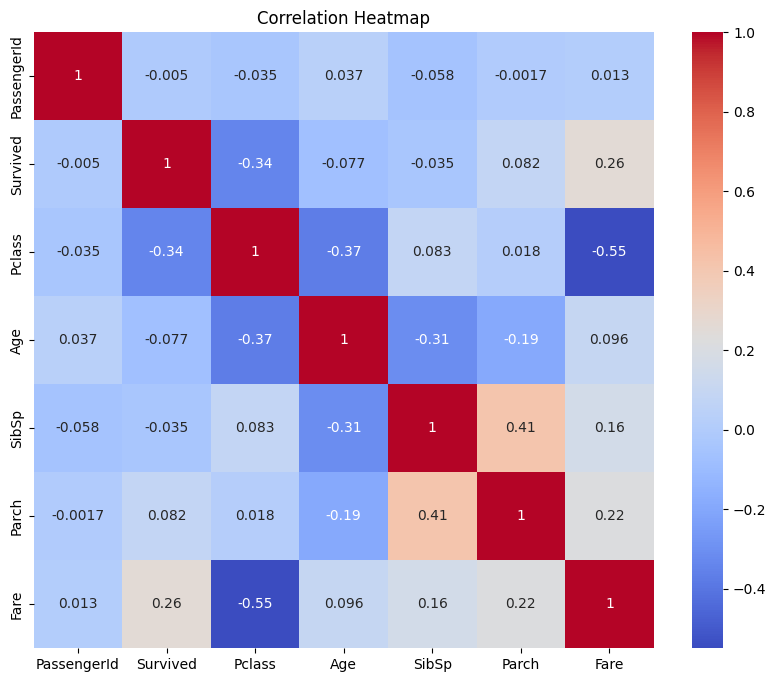

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

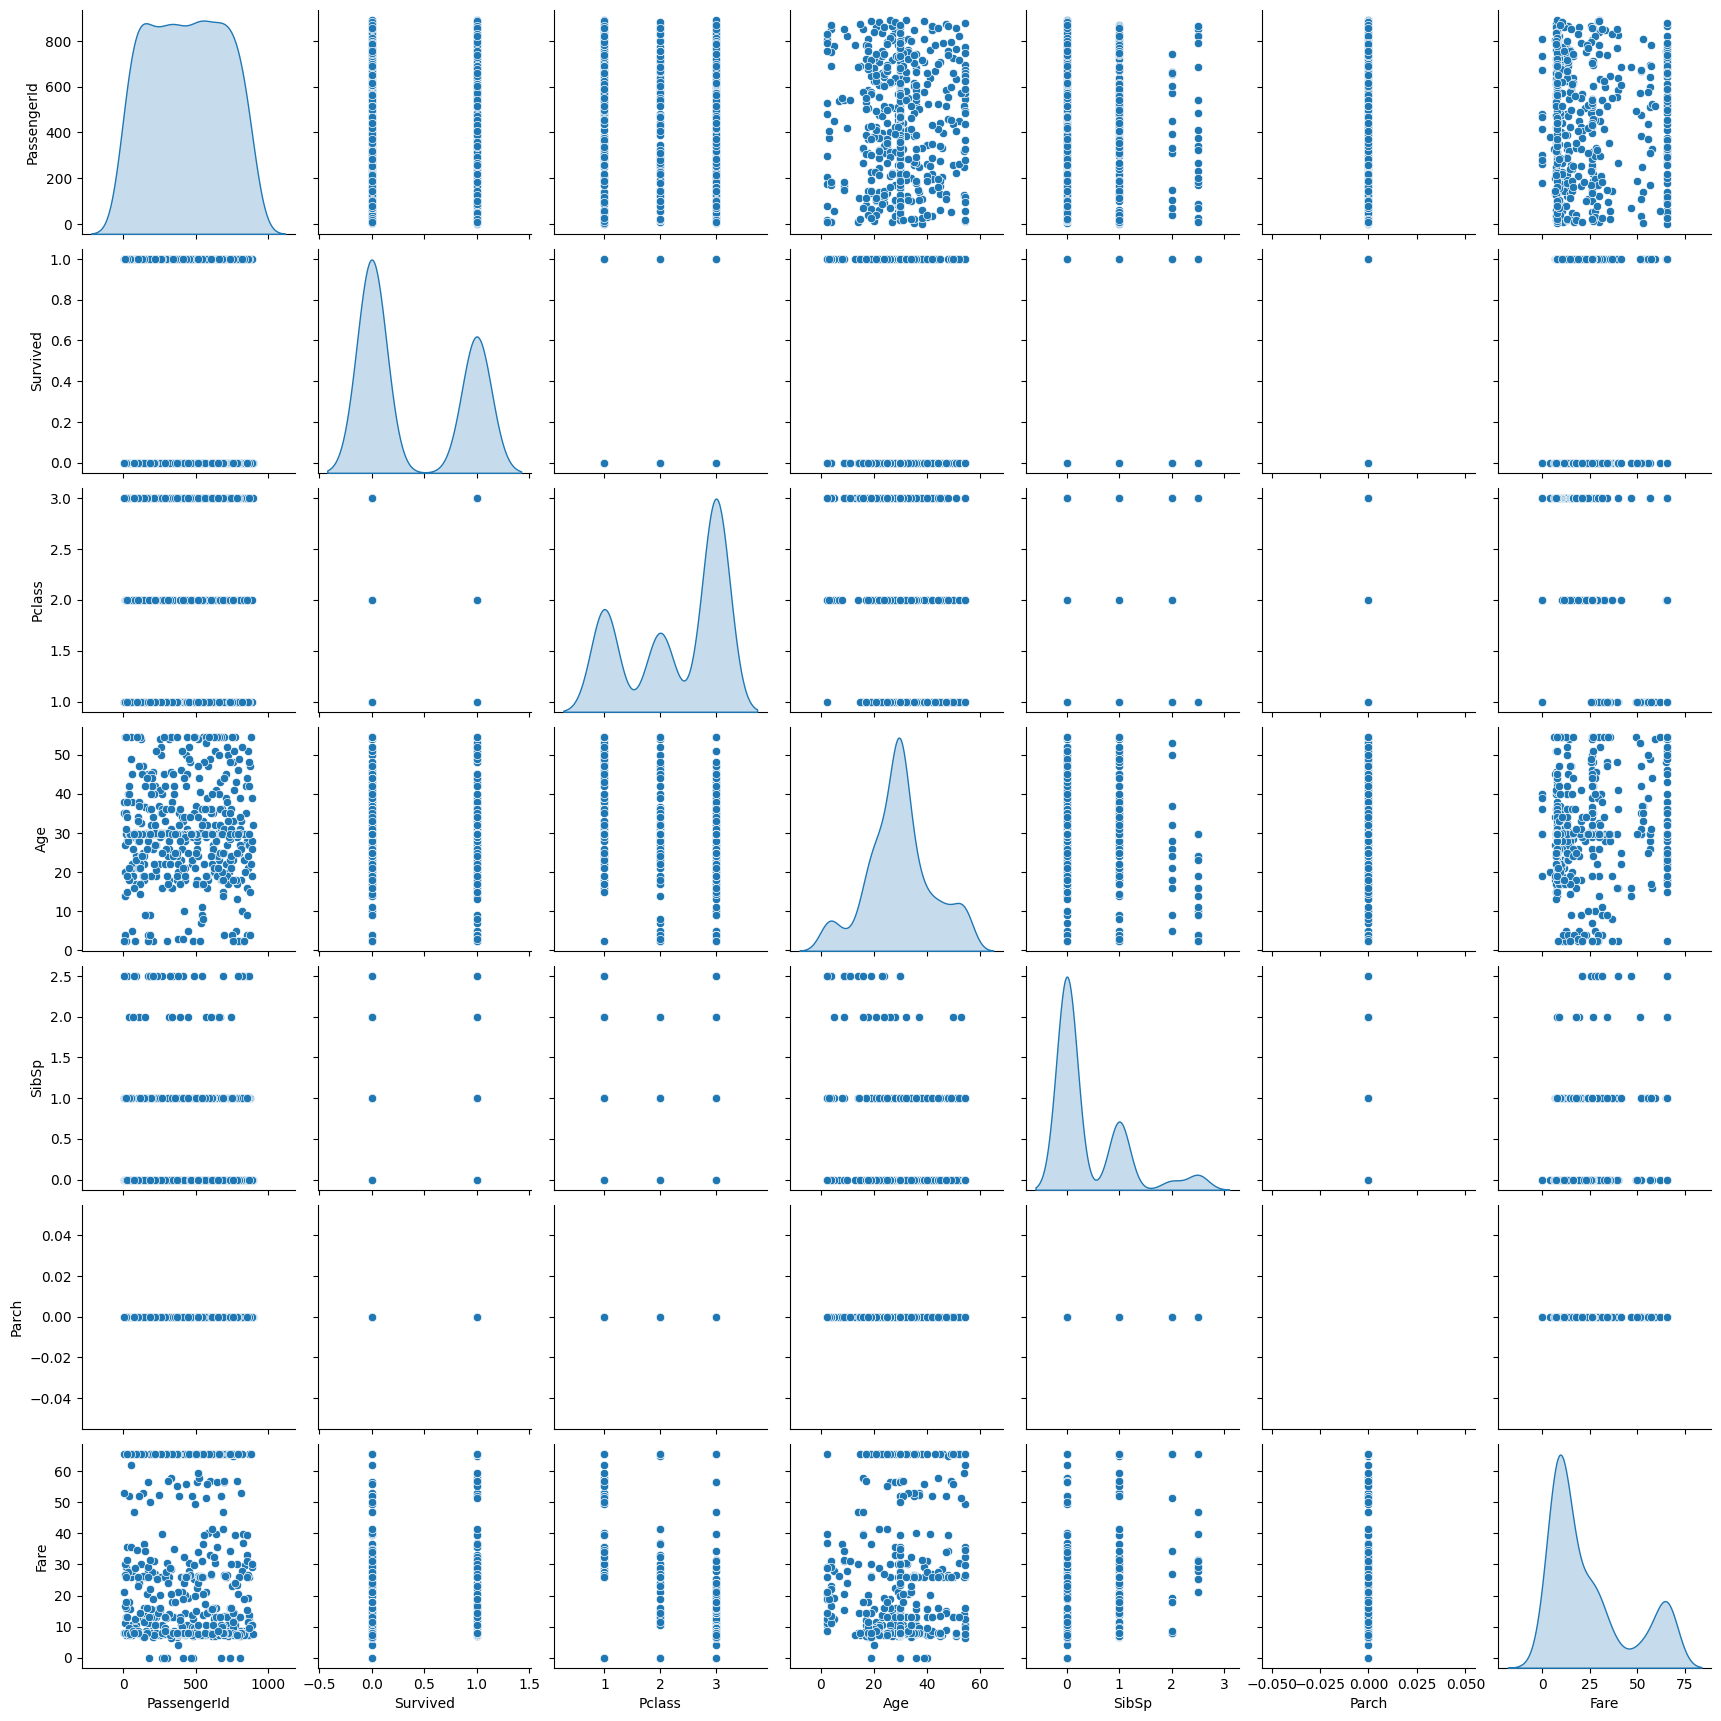

In [76]:
# Pair Plot (advanced visualization)

sns.pairplot(df.sample(n=min(500, len(df))), diag_kind="kde")
plt.show()

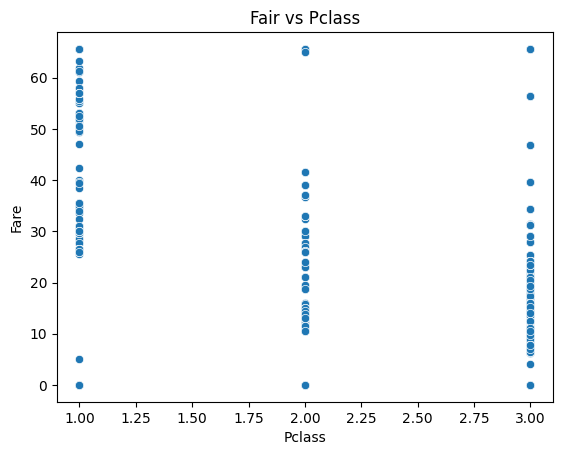

In [78]:
#  Example: Relationship between two key variables

sns.scatterplot(x="Pclass", y="Fare", data=df)
plt.title("Fair vs Pclass")
plt.show()

In [79]:
#Check corelation values

corr_matrix = df.corr(numeric_only=True)

corr_pairs = (
    corr_matrix.unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

In [23]:
corr_pairs.head(10)

PassengerId  PassengerId    1.000000
Parch        SibSp          0.414838
Survived     Fare           0.257307
Fare         Parch          0.216225
SibSp        Fare           0.159651
Age          Fare           0.091566
SibSp        Pclass         0.083081
Survived     Parch          0.081629
Age          PassengerId    0.033207
Parch        Pclass         0.018443
dtype: float64

In [ ]:
#Model Building

In [81]:
#convert the 'Sex' column to numerical representation

df_processed = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})

In [82]:
df_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1.0,0.0,7.2500
1,1,1,1,38.0,1.0,0.0,65.6344
2,1,3,1,26.0,0.0,0.0,7.9250
3,1,1,1,35.0,1.0,0.0,53.1000
4,0,3,0,35.0,0.0,0.0,8.0500


In [98]:
train = df_processed
test = pd.read_csv("Titanic_test.csv")

In [103]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:
# Features for training
X_train = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = train['Survived']

# Features for test data (same columns)
X_test = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]



In [105]:
X_train = X_train.fillna(X_train.mean(numeric_only=True))
X_test = X_test.fillna(X_test.mean(numeric_only=True))


In [106]:
#Train the logestic regression model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [107]:
y_pred = model.predict(X_test)


In [109]:
#Evaluation of the performance of the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on training data itself
y_train_pred = model.predict(X_train)

# Evaluate model
print("✅ Accuracy on training data:", accuracy_score(y_train, y_train_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\n📋 Classification Report:\n", classification_report(y_train, y_train_pred))


✅ Accuracy on training data: 0.7037037037037037

📊 Confusion Matrix:
 [[474  75]
 [189 153]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78       549
           1       0.67      0.45      0.54       342

    accuracy                           0.70       891
   macro avg       0.69      0.66      0.66       891
weighted avg       0.70      0.70      0.69       891



In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [111]:
# Probability of class 1 (Survived)
y_train_prob = model.predict_proba(X_train)[:, 1]


In [112]:
#compute ROC-AUC curve value

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
roc_auc = roc_auc_score(y_train, y_train_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7250023967021378


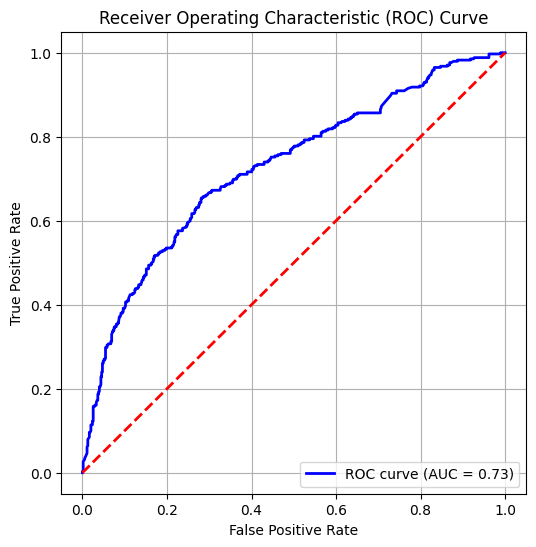

In [113]:
#Visualize ROC curve

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [89]:
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
coefficients['Absolute Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)
display(coefficients)

,Coefficient,Absolute Coefficient
Sex,2.549916,2.549916
Pclass,-0.909094,0.909094
SibSp,-0.439627,0.439627
Age,-0.033735,0.033735
Fare,0.009040,0.009040
Parch,0.000000,0.000000


In [114]:

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)


  Feature  Coefficient
0  Pclass    -0.751146
1     Age    -0.039752
2   SibSp    -0.233436
3   Parch     0.000000
4    Fare     0.018412


In [ ]:
#Interview Question

In [ ]:
#1. What is the difference between precision and recall?

Ans- Precision - Precision tells you how accurate your positive predictions are.
High precision means the model makes very few false positive mistakes.

Recall - Recall tells you how well your model finds all the actual positive cases.
High recall means the model makes very few false negative mistakes.

In [ ]:
# 2. What is cross-validation, and why is it important in binary classification?

In [ ]:
Ans - Cross-validation is a model evaluation technique used to assess how well a machine learning model
will perform on new data.

Instead of training and testing the model on just one split of the data, cross-validation divides the dataset 
into multiple parts and tests the model on each part one by one.

Why It’s Important -:

1.Prevents overfitting –
Ensures the model doesn’t just memorize training data but actually generalizes well to new examples.

2.Gives a more accurate performance estimate –
Because the model is tested multiple times on different data splits, you get a better idea of how it will perform in real-world scenarios.

3.Useful with limited data –
When you don’t have much data, cross-validation allows you to use every sample for both training and testing (just at different times).

4.Fair model comparison –
Helps compare different models (e.g., logistic regression vs. decision tree) using the same validation strategy.

In [2]:
from IPython.display import HTML

HTML('<a href="https://github.com/amanullah-ds/Logestic---Regression-/blob/main/Loggestic%20Regression%20(Asg_6)%20(1).ipynb">Open Google</a>')


In [ ]:
#For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 

Sorry sir, I could not do that but I am trying and learning to deploy the app using Extreme Lit Online Cloud.